# Cargar librerías esenciales

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan


# Leemos la data

In [2]:
data = pd.read_csv("/home/jeffersson/Documentos/retencion_clientes/retencion_clientes.csv")


In [3]:
data = data.rename(columns={
    "Profit": "utilidad_bruta",
    "MTenure": "antiguedad_gerente",
    "CTenure": "antiguedad_crew",
    "MgrSkill": "habilidad_gerente",
    "CrewSkill": "habilidad_crew",
    "ServQual": "calidad_servicio",
    "Pop": "poblacion",
    "Comp": "competencia",
    "PedCount": "conteo_peatones",
    "Visibility": "visibilidad",
    "Res": "restaurantes",
    "Hours24": "horas_24"
})


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store               75 non-null     int64  
 1   Sales               75 non-null     int64  
 2   utilidad_bruta      75 non-null     int64  
 3   antiguedad_gerente  75 non-null     float64
 4   antiguedad_crew     75 non-null     float64
 5   poblacion           75 non-null     int64  
 6   competencia         75 non-null     float64
 7   visibilidad         75 non-null     int64  
 8   conteo_peatones     75 non-null     int64  
 9   restaurantes        75 non-null     int64  
 10  horas_24            75 non-null     int64  
 11  habilidad_crew      75 non-null     float64
 12  habilidad_gerente   75 non-null     float64
 13  calidad_servicio    75 non-null     float64
dtypes: float64(6), int64(8)
memory usage: 8.3 KB


# Distribución de variables relevantes

In [6]:
data.describe()

,store,Sales,utilidad_bruta,antiguedad_gerente,antiguedad_crew,poblacion,competencia,visibilidad,conteo_peatones,restaurantes,horas_24,habilidad_crew,habilidad_gerente,calidad_servicio
count,75.000000,7.500000e+01,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,38.000000,1.205413e+06,276313.613333,45.296444,13.931499,9825.586667,3.787751,3.080000,2.960000,0.960000,0.840000,3.456667,3.637976,87.153844
std,21.794495,3.045313e+05,89404.076338,57.671551,17.697517,5911.673770,1.311390,0.749053,0.992404,0.197279,0.369075,0.406585,0.408457,12.613392
min,1.000000,6.993060e+05,122180.000000,0.000000,0.887064,1046.000000,1.651364,2.000000,1.000000,0.000000,0.000000,2.060000,2.956667,57.895520
25%,19.500000,9.845790e+05,211003.500000,6.670391,4.394251,5616.500000,3.150664,3.000000,2.000000,1.000000,1.000000,3.225000,3.344445,78.947760
50%,38.000000,1.127332e+06,265014.000000,24.118560,7.211499,8896.000000,3.628561,3.000000,3.000000,1.000000,1.000000,3.500000,3.588889,89.473880
75%,56.500000,1.362388e+06,331313.500000,50.915125,17.215610,14104.000000,4.229525,4.000000,4.000000,1.000000,1.000000,3.655000,3.925000,99.900525
max,75.000000,2.113089e+06,518998.000000,277.987700,114.151900,26519.000000,11.127880,5.000000,5.000000,1.000000,1.000000,4.640000,4.622222,100.000000


# Planteamiento del modelo lineal

In [10]:
formula_base = """
utilidad_bruta ~ antiguedad_gerente + antiguedad_crew
         + habilidad_gerente + habilidad_crew + calidad_servicio
         + poblacion + competencia + conteo_peatones + visibilidad + restaurantes + horas_24
"""

model_base = smf.ols(formula_base, data=data).fit()
print(model_base.summary())


                            OLS Regression Results                            
Dep. Variable:         utilidad_bruta   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     14.27
Date:                Tue, 30 Dec 2025   Prob (F-statistic):           2.77e-13
Time:                        01:08:41   Log-Likelihood:                -914.09
No. Observations:                  75   AIC:                             1852.
Df Residuals:                      63   BIC:                             1880.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.414e+05   9.82

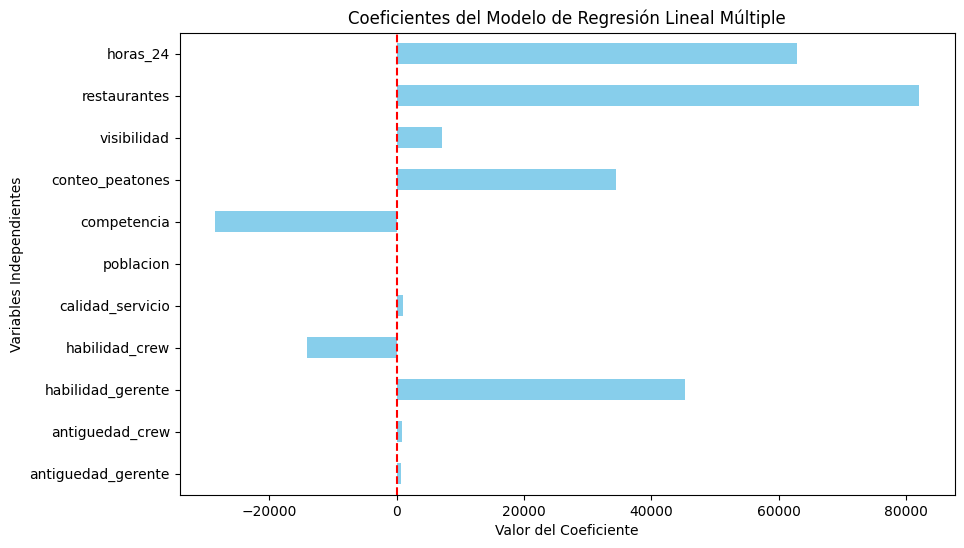

In [11]:
# Haremos un gráfico de barras horizontales de los coeficientes del modelo
coeficientes = model_base.params[1:]  # Excluimos el intercepto
errores_estandar = model_base.bse[1:]  # Excluimos el intercepto
plt.figure(figsize=(10, 6))
coeficientes.plot(kind='barh', color='skyblue', ecolor='black')
plt.title('Coeficientes del Modelo de Regresión Lineal Múltiple')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Variables Independientes')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

# Revisamos los residuos 

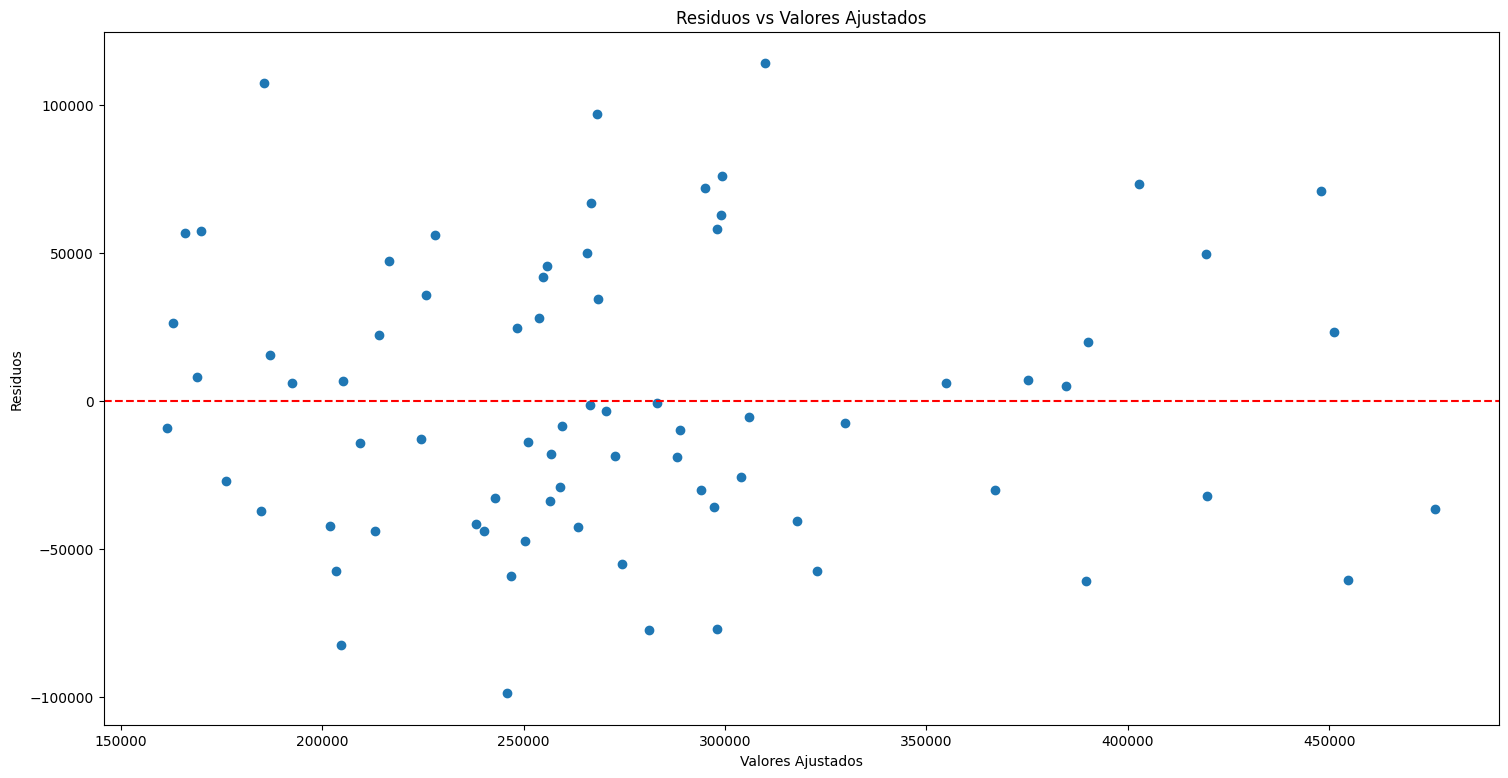

In [12]:
# Hacemos un scatter entre residuos y valores ajustados
plt.figure(figsize=(18, 9))
plt.scatter(model_base.fittedvalues, model_base.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados')
plt.show()

In [13]:
bp_test = het_breuschpagan(model_base.resid, model_base.model.exog)
labels = ['LM Stat','LM p-value','F Stat','F p-value']
dict(zip(labels, bp_test))

if bp_test[1] < 0.05:
    print("Rechazamos la hipótesis nula de homocedasticidad. Hay evidencia de heterocedasticidad.")
else:
    print("No rechazamos la hipótesis nula de homocedasticidad. No hay evidencia de heterocedasticidad.")


No rechazamos la hipótesis nula de homocedasticidad. No hay evidencia de heterocedasticidad.


In [14]:
X = model_base.model.exog
vif = pd.DataFrame()
vif["variable"] = model_base.model.exog_names
vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif


,variable,VIF
0,Intercept,269.043027
1,antiguedad_gerente,1.306299
2,antiguedad_crew,1.381389
3,habilidad_gerente,1.289464
4,habilidad_crew,1.329707
5,calidad_servicio,1.299654
6,poblacion,1.909784
7,competencia,1.264700
8,conteo_peatones,1.870957
9,visibilidad,1.143755


# Propuesta del modelo 2

In [15]:
data['antiguedad_gerente_c'] = data['antiguedad_gerente'] - data['antiguedad_gerente'].mean()
data['antiguedad_crew_c'] = data['antiguedad_crew'] - data['antiguedad_crew'].mean()

data['antiguedad_gerente_c2'] = data['antiguedad_gerente_c']**2
data['antiguedad_crew_c2'] = data['antiguedad_crew_c']**2

In [16]:
formula_nl = """
utilidad_bruta ~ antiguedad_gerente_c + antiguedad_gerente_c2
         + antiguedad_crew_c + antiguedad_crew_c2
         + habilidad_gerente + habilidad_crew + calidad_servicio
         + poblacion + competencia + conteo_peatones + visibilidad + restaurantes + horas_24
"""

model_nl = smf.ols(formula_nl, data=data).fit()
print(model_nl.summary())


                            OLS Regression Results                            
Dep. Variable:         utilidad_bruta   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     15.31
Date:                Tue, 30 Dec 2025   Prob (F-statistic):           1.32e-14
Time:                        01:08:42   Log-Likelihood:                -906.61
No. Observations:                  75   AIC:                             1841.
Df Residuals:                      61   BIC:                             1874.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.727e+

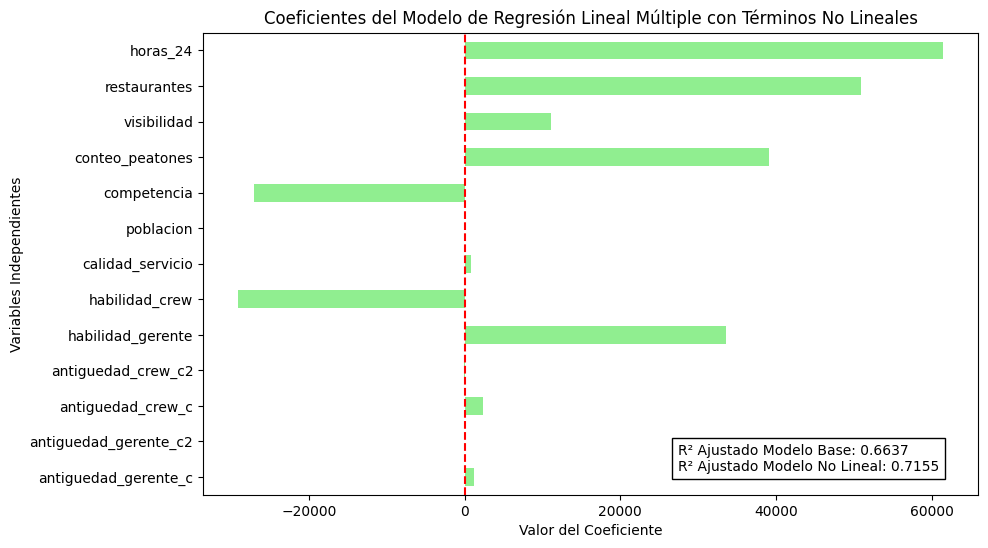

In [35]:
# Graficamos los coeficientes del nuevo modelo
coeficientes_nl = model_nl.params[1:]  # Excluimos el intercepto
errores_estandar_nl = model_nl.bse[1:]  # Excluimos el intercepto
plt.figure(figsize=(10, 6))
coeficientes_nl.plot(kind='barh', color='lightgreen', ecolor='black')
plt.title('Coeficientes del Modelo de Regresión Lineal Múltiple con Términos No Lineales')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Variables Independientes')
plt.axvline(x=0, color='red', linestyle='--')

# Añadiremos un cuadro con los valores de R² ajustado de ambos modelos
r2_base = model_base.rsquared_adj
r2_nl = model_nl.rsquared_adj
plt.figtext(0.6, 0.15, f'R² Ajustado Modelo Base: {r2_base:.4f}\nR² Ajustado Modelo No Lineal: {r2_nl:.4f}',
            bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

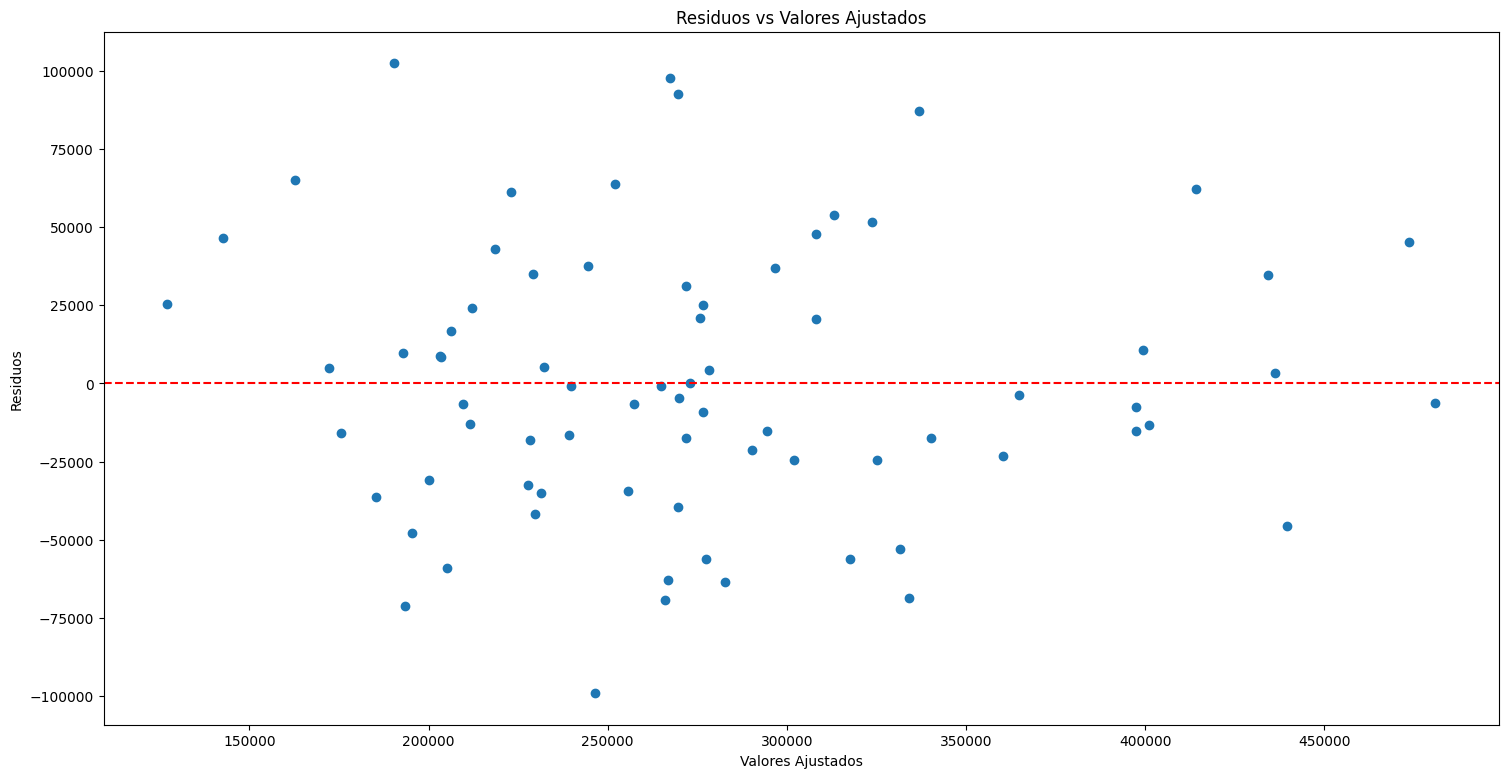

In [18]:
# Hacemos un scatter entre residuos y valores ajustados
plt.figure(figsize=(18, 9))
plt.scatter(model_nl.fittedvalues, model_nl.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Residuos vs Valores Ajustados')
plt.show()

In [19]:
beta1 = model_nl.params['antiguedad_gerente_c']
beta2 = model_nl.params['antiguedad_gerente_c2']

data['marginal_mtenure'] = beta1 + 2*beta2*data['antiguedad_gerente_c']
data[['antiguedad_gerente','marginal_mtenure']].head()

,antiguedad_gerente,marginal_mtenure
0,0.00000,1509.284458
1,86.22219,827.327248
2,23.88854,1320.342817
3,0.00000,1509.284458
4,3.87737,1478.617173


In [20]:
# Solo ubicación
model_loc = smf.ols("""
utilidad_bruta ~ poblacion + competencia + conteo_peatones + visibilidad + restaurantes + horas_24
""", data=data).fit()

# Solo humanos
model_hum = smf.ols("""
utilidad_bruta ~ antiguedad_gerente_c + antiguedad_gerente_c2
         + antiguedad_crew_c + antiguedad_crew_c2
         + habilidad_gerente + habilidad_crew + calidad_servicio
""", data=data).fit()

pd.DataFrame({
    "Modelo": ["Ubicación", "Humanos", "Completo"],
    "R2_adj": [
        model_loc.rsquared_adj,
        model_hum.rsquared_adj,
        model_nl.rsquared_adj
    ],
    "AIC": [
        model_loc.aic,
        model_hum.aic,
        model_nl.aic
    ]
})


,Modelo,R2_adj,AIC
0,Ubicación,0.299000,1902.986908
1,Humanos,0.260851,1907.850153
2,Completo,0.715467,1841.214903


In [21]:
print("""
Conclusión:
- La antigüedad tiene un efecto positivo pero decreciente.
- El impacto marginal es mayor en tiendas con baja antigüedad.
- Los factores humanos son comparables o superiores a la ubicación.
- Las políticas de incentivos deben ser diferenciadas.
""")



Conclusión:
- La antigüedad tiene un efecto positivo pero decreciente.
- El impacto marginal es mayor en tiendas con baja antigüedad.
- Los factores humanos son comparables o superiores a la ubicación.
- Las políticas de incentivos deben ser diferenciadas.



In [22]:
from statsmodels.stats.outliers_influence import OLSInfluence

influence = OLSInfluence(model_nl)

data['cooks_d'] = influence.cooks_distance[0]
data['leverage'] = influence.hat_matrix_diag
data['student_resid'] = influence.resid_studentized_external


In [23]:
n = data.shape[0]
k = model_nl.df_model

data['flag_cook'] = data['cooks_d'] > (4 / n)
data['flag_resid'] = abs(data['student_resid']) > 3
data['flag_lev'] = data['leverage'] > (2 * (k + 1) / n)


In [24]:
data[['flag_cook','flag_resid','flag_lev']].sum()


flag_cook     3
flag_resid    0
flag_lev      6
dtype: int64

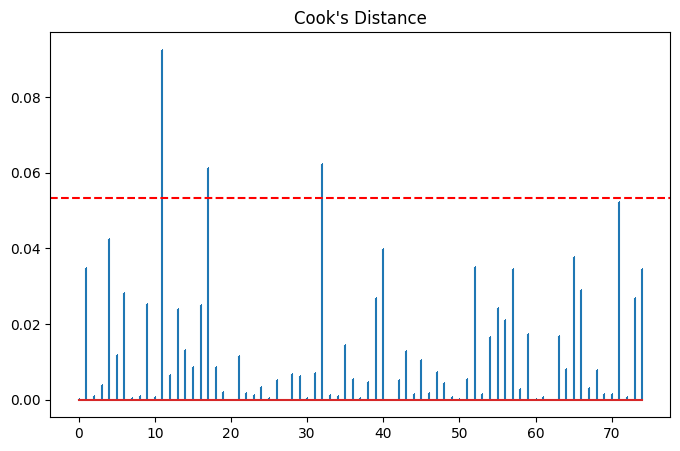

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.stem(data.index, data['cooks_d'], markerfmt=",")
plt.axhline(4/n, color='red', linestyle='--')
plt.title("Cook's Distance")
plt.show()


In [26]:
data_trim = data[~data['flag_cook']]

model_nl_trim = smf.ols(formula_nl, data=data_trim).fit()
print(model_nl_trim.summary())


                            OLS Regression Results                            
Dep. Variable:         utilidad_bruta   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     16.54
Date:                Tue, 30 Dec 2025   Prob (F-statistic):           6.01e-15
Time:                        01:08:43   Log-Likelihood:                -867.18
No. Observations:                  72   AIC:                             1762.
Df Residuals:                      58   BIC:                             1794.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6418.19

In [27]:
X = model_nl.model.exog
y = model_nl.model.endog

rlm = sm.RLM(y, X, M=sm.robust.norms.HuberT()).fit()
print(rlm.summary())


                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   75
Model:                            RLM   Df Residuals:                       61
Method:                          IRLS   Df Model:                           13
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Tue, 30 Dec 2025                                         
Time:                        01:08:43                                         
No. Iterations:                     2                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.392e+04   1.06e+05      0.319      0.7